In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.units as u
from scipy.optimize import curve_fit

In [2]:
df1 = pd.read_csv('1to13_flare_out.csv')
df2 = pd.read_csv('14to26_flare_out.csv')
df = pd.concat([df1, df2])

color_flare = df['G_BPbrmag'] - df['G_RPmag']
#df = df[(color_flare > 2) & (color_flare < 2.2)]

beta = 2.107 +/- 0.010


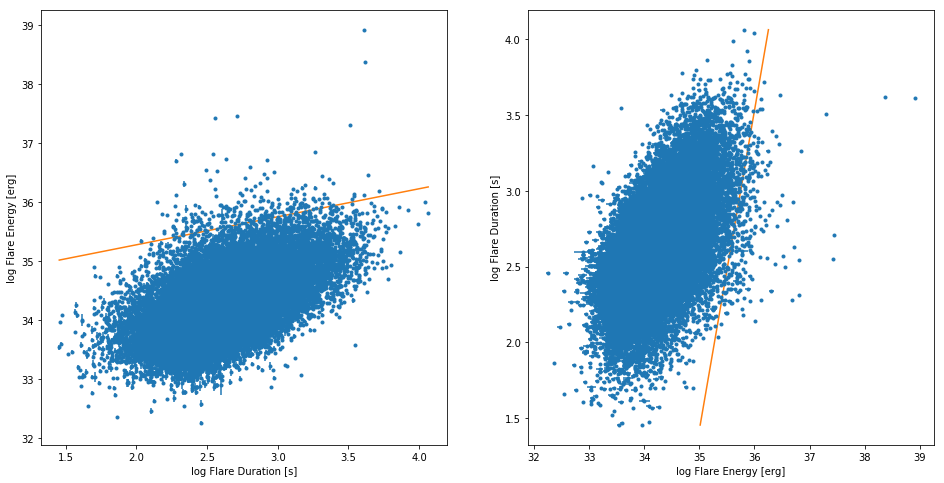

In [4]:
en = df['energy'].values
en_err = df['energy_err'].values
dur = (df['fwhm'].values*u.d).to(u.s).value # How the heck is duration defined?

# Maehara 2015: e-folding decay time of flare intensity after its peak
# See Tu + Wang 2018 for linear regression technique

logx = np.log10(dur)
logy = np.log10(en)
logyerr = 1/np.log(10)*en_err/en

fig, axes = plt.subplots(figsize=(16,8), ncols=2)
ax = axes[0]
ax.errorbar(logx, logy, yerr=logyerr, fmt='.')
ax.set_xlabel('log Flare Duration [s]')
ax.set_ylabel('log Flare Energy [erg]')
    
def func1(x, alpha, beta):
    return alpha + x*beta

# Can only provide y error bars, so flip x and y before fitting
popt, pcov = curve_fit(func1, logx, logy, p0=(0.1, 0.5), sigma=logyerr)
alpha, beta = popt[0], popt[1]
beta_err = np.sqrt(pcov[1][1])

xmodel = np.linspace(np.min(logx), np.max(logx))
ymodel = func1(xmodel, alpha, beta)
ax.plot(xmodel, ymodel)

ax = axes[1]
ax.errorbar(logy, logx, xerr=logyerr, fmt='.')
ax.set_xlabel('log Flare Energy [erg]')
ax.set_ylabel('log Flare Duration [s]')
ax.plot(ymodel, xmodel)

print('beta = {:.3f}'.format(np.mean(1/beta)) + ' +/- {:.3f}'.format(np.mean(beta_err)))